In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats


In [ ]:
Housing = pd.read_csv('Housing.csv')


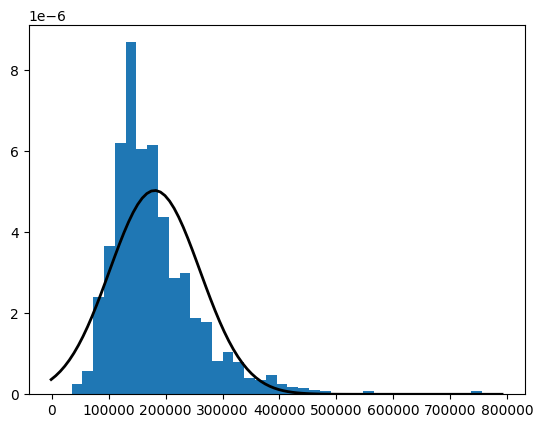

In [ ]:
SalePrice = Housing['SalePrice']
plt.hist(SalePrice, bins = int(np.sqrt(len(SalePrice))), density = True)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, np.mean(SalePrice), np.std(SalePrice)) , 'k', linewidth = 2)

plt.show()

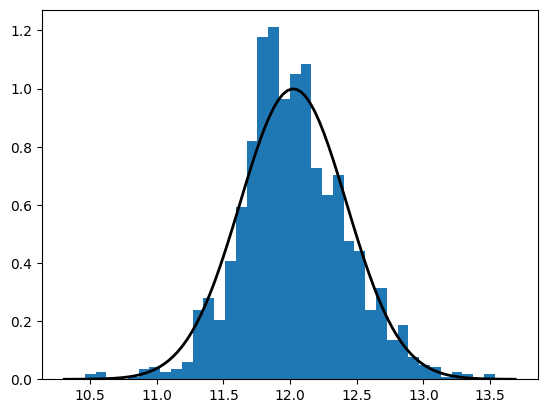

In [ ]:
logSalePrice = np.log(Housing['SalePrice'])

plt.hist(logSalePrice, bins = int(np.sqrt(len(logSalePrice))), density = True)
xminl, xmaxl = plt.xlim()
xl = np.linspace(xminl, xmaxl, 100)
plt.plot(xl, stats.norm.pdf(xl, np.mean(logSalePrice), np.std(logSalePrice)), 'k', linewidth = 2)

plt.show()

In [ ]:
numerical_variables = Housing.select_dtypes(include = ['number']).columns.tolist()
Housing[numerical_variables] = Housing[numerical_variables].fillna(Housing[numerical_variables].mean())
categorical_variables = Housing.select_dtypes(include=['object']).columns.tolist()
NA_variables=['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
Housing[NA_variables] = Housing[NA_variables].fillna('NA')

for col in categorical_variables:
  Housing[col] = Housing[col].fillna(Housing[col].mode()[0])

Housing = pd.get_dummies(Housing, columns = categorical_variables)
print(Housing)


        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003    

In [ ]:
Housing2 = pd.read_csv('Housing.csv')
Housing2 = Housing2[Housing2.select_dtypes(exclude = ['object', 'category']).columns.tolist()]
Housing2[numerical_variables] = Housing2[numerical_variables].fillna(Housing2[numerical_variables].mean())

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [ ]:
X = Housing2.drop(columns = ['Id', 'SalePrice'])
Y = np.log(Housing2['SalePrice'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
train_idx = X_train.index
test_idx = X_test.index

In [ ]:
model = LinearRegression()

model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)

train_MSE = mean_squared_error(Y_train, Y_train_pred)
train_R2 = r2_score(Y_train, Y_train_pred)
print(f'Train MSE :{train_MSE}, R2: {train_R2}')


Y_test_pred = model.predict(X_test)
test_MSE = mean_squared_error(Y_test, Y_test_pred)
test_R2 = r2_score(Y_test, Y_test_pred)
print(f'Test MSE :{test_MSE}, R2: {test_R2}')


coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

Train MSE :0.021955659514110833, R2: 0.8618085128058344
Test MSE :0.02012497065813751, R2: 0.8745625847148324
          Feature   Coefficient
0      MSSubClass -7.826556e-04
1     LotFrontage -2.514405e-04
2         LotArea  1.802092e-06
3     OverallQual  8.674838e-02
4     OverallCond  4.416069e-02
5       YearBuilt  2.752051e-03
6    YearRemodAdd  1.393174e-03
7      MasVnrArea  2.644146e-05
8      BsmtFinSF1  1.664530e-05
9      BsmtFinSF2  4.522137e-06
10      BsmtUnfSF  8.864706e-06
11    TotalBsmtSF  3.003214e-05
12       1stFlrSF  6.432420e-05
13       2ndFlrSF  1.906189e-05
14   LowQualFinSF  3.064333e-05
15      GrLivArea  1.140294e-04
16   BsmtFullBath  7.674784e-02
17   BsmtHalfBath  3.079705e-02
18       FullBath  4.546126e-02
19       HalfBath  2.697412e-02
20   BedroomAbvGr -9.121836e-03
21   KitchenAbvGr -2.761854e-02
22   TotRmsAbvGrd  1.917860e-02
23     Fireplaces  5.344911e-02
24    GarageYrBlt  3.927784e-05
25     GarageCars  7.155563e-02
26     GarageArea -2.14959

In [ ]:
A = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis = 1)
coefficients = np.linalg.inv(A.T @ A) @ A.T @ Y_train
print(f'Coefficients: {coefficients}')

Coefficients: [-9.51212036e+03  2.78193446e-03  1.03257650e+00 -7.32396172e-05
 -6.25833873e+01  2.10091346e+01  4.65046303e+00  2.76424038e-01
 -4.11892375e-02  1.23013554e+12  1.23013554e+12  1.23013554e+12
 -1.23013554e+12  6.38152772e-02  4.72496325e-02  3.51278870e-02
 -1.42528130e-02  7.67478420e-02  3.07970470e-02  4.54612563e-02
  2.69741166e-02 -9.12183552e-03 -2.76185386e-02  1.91785966e-02
  5.34491100e-02  3.92778365e-05  7.15556296e-02 -2.14959585e-05
  1.53080202e-04 -1.19088684e-05  2.15647680e-04  2.84973840e-04
  2.83020751e-04 -3.34222743e-04  7.31056938e-07  1.30938997e-03
 -8.75929381e-03]


In [ ]:
residuals = Y_train - A @ coefficients
sigma_2 = (residuals.T @ residuals) / (A.shape[0] - A.shape[1])
cov_matrix = sigma_2 * np.linalg.inv(A.T @ A)
std_err = np.sqrt(np.diag(cov_matrix))
print(cov_matrix)

[[ 2.68177079e+07 -2.41253313e+01  1.83407104e+01 ... -4.07240632e-01
  -8.74322263e+02 -1.32765349e+04]
 [-2.41253313e+01  1.05582567e-02  5.14938399e-03 ...  2.55687105e-05
   6.38324053e-03  1.29662150e-02]
 [ 1.83407104e+01  5.14938399e-03  3.36757079e-02 ...  2.57512808e-05
   6.36921492e-03 -9.36734862e-03]
 ...
 [-4.07240632e-01  2.55687105e-05  2.57512808e-05 ...  3.49890567e-05
   1.02634531e-04  2.63444612e-04]
 [-8.74322263e+02  6.38324053e-03  6.36921492e-03 ...  1.02634531e-04
   1.58292562e+00  4.32036470e-01]
 [-1.32765349e+04  1.29662150e-02 -9.36734862e-03 ...  2.63444612e-04
   4.32036470e-01  6.64165505e+00]]


<ipython-input-272-971c2e6cbf12>:4: RuntimeWarning: invalid value encountered in sqrt
  std_err = np.sqrt(np.diag(cov_matrix))


This was expected as our matrix A is poorly conditionned.

In [ ]:
SSE = (Y_train - A @ coefficients).T @ (Y_train - A @ coefficients)
insample_MSE =  SSE / A.shape[0]
insample_R2 = 1 -  SSE/ ((Y_train - np.mean(Y_train)).T @ (Y_train - np.mean(Y_train)))
print(f'Insample MSE :{insample_MSE}, R2: {insample_R2}')


Insample MSE :11079.809939304118, R2: -69736.61878376182


In [ ]:
A = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis = 1)
coefficients = np.linalg.pinv(A.T @ A) @ A.T @ Y_train
print(f'coefficients: {coefficients}')


residuals = Y_train - A @ coefficients
sigma_2 = (residuals.T @ residuals) / (A.shape[0] - A.shape[1])
cov_matrix = sigma_2 * np.linalg.pinv(A.T @ A)
std_err = np.sqrt(np.diag(cov_matrix))
print(cov_matrix)

SSE = (Y_train - A @ coefficients).T @ (Y_train - A @ coefficients)
insample_MSE =  SSE / A.shape[0]
insample_R2 = 1 -  SSE/ ((Y_train - np.mean(Y_train)).T @ (Y_train - np.mean(Y_train)))
print(f'Insample MSE :{insample_MSE}, R2: {insample_R2}')


coefficients: [ 1.99401089e+01 -7.82655503e-04 -2.51440552e-04  1.80209262e-06
  8.67483712e-02  4.41606915e-02  2.75205158e-03  1.39317333e-03
  2.64414535e-05  1.66454086e-05  4.52222999e-06  8.86482356e-06
  3.00320217e-05  6.43242947e-05  1.90619832e-05  3.06434244e-05
  1.14029338e-04  7.67478345e-02  3.07970664e-02  4.54612497e-02
  2.69741092e-02 -9.12183416e-03 -2.76185522e-02  1.91785988e-02
  5.34491126e-02  3.92780257e-05  7.15556363e-02 -2.14959720e-05
  1.53080181e-04 -1.19088051e-05  2.15647747e-04  2.84973780e-04
  2.83020744e-04 -3.34222650e-04  7.31058619e-07  1.30939358e-03
 -8.75923900e-03]
[[ 5.31412947e+01 -4.78063358e-05  3.63433503e-05 ... -8.06977809e-07
  -1.73253522e-03 -2.63084469e-02]
 [-4.78061490e-05  2.09221538e-08  1.02039770e-08 ...  5.06667387e-11
   1.26489634e-08  2.56935422e-08]
 [ 3.63434897e-05  1.02039768e-08  6.67315032e-08 ...  5.10285291e-11
   1.26211934e-08 -1.85621068e-08]
 ...
 [-8.06977781e-07  5.06667415e-11  5.10285313e-11 ...  6.933402

v.)

In [ ]:
model = sm.OLS(Y_train, A)
results = model.fit()
mse = np.mean(results.resid ** 2)
print(f'MSE: {mse}')
print(results.summary())


MSE: 0.021955659514110822
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     181.0
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:18:45   Log-Likelihood:                 501.22
No. Observations:                1022   AIC:                            -932.4
Df Residuals:                     987   BIC:                            -759.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9402     

d.)

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)

Y_train_pred = model.predict(X_train_poly)

train_MSE = mean_squared_error(Y_train, Y_train_pred)
train_R2 = r2_score(Y_train, Y_train_pred)
print(f'Train MSE :{train_MSE}, R2: {train_R2}')


Y_test_pred = model.predict(X_test_poly)
test_MSE = mean_squared_error(Y_test, Y_test_pred)
test_R2 = r2_score(Y_test, Y_test_pred)
print(f'Test MSE :{test_MSE}, R2: {test_R2}')


Train MSE :0.009387541982488744, R2: 0.9409137135314004
Test MSE :3.7962720399386334, R2: -22.661875612062282


Fitting the polynomial regression model seems to result in a lot of overfitting.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold


In [ ]:
X = Housing.drop(columns = ['Id', 'SalePrice'])
Y = np.log(Housing['SalePrice'])
X_train = X.iloc[train_idx].reset_index(drop=True)
X_test = X.iloc[test_idx].reset_index(drop = True)
Y_train = Y.iloc[train_idx].reset_index(drop = True)
Y_test = Y.iloc[test_idx].reset_index(drop = True)


model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
train_MSE = mean_squared_error(Y_train, Y_train_pred)
train_R2 = r2_score(Y_train, Y_train_pred)
print(f'Train MSE :{train_MSE}, R2: {train_R2}')

Y_test_pred = model.predict(X_test)
test_MSE = mean_squared_error(Y_test, Y_test_pred)
test_R2 = r2_score(Y_test, Y_test_pred)
print(f'Test MSE :{test_MSE}, R2: {test_R2}')



Train MSE :0.007966726460627318, R2: 0.9498564924931708
Test MSE :0.019779116722383753, R2: 0.8767182660573843


In [ ]:
from os import truncate
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
threshold_values = np.logspace(-20,1, 10)

def truncated_pseudoinverse(X, y, threshold):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    s_inv = np.array([1/x if x > threshold else 0 for x in s])
    X_pseudo = Vt.T @ np.diag(s_inv) @ U.T
    return X_pseudo @ y

cross_val_split = RepeatedKFold(n_splits=8, n_repeats = 3)
means = []

for c in threshold_values:

  mse_split = []
  for train_idx, val_idx in cross_val_split.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]
    A_train_fold = np.concatenate((np.ones((X_train_fold.shape[0], 1)), X_train_fold), axis = 1)
    coefficients_truncated = truncated_pseudoinverse(A_train_fold, Y_train_fold, c)

    A_val_fold = np.concatenate((np.ones((X_val_fold.shape[0], 1)), X_val_fold), axis = 1)
    Y_val_pred_truncated = A_val_fold @ coefficients_truncated
    val_mse_truncated = mean_squared_error(Y_val_fold, Y_val_pred_truncated)
    mse_split.append(val_mse_truncated)
  means.append(np.mean(mse_split))

threshold = threshold_values[np.argmin(means)]
print(f'Best threshold: {threshold}')

A_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis = 1)
coefficients_truncated = truncated_pseudoinverse(A_train, Y_train, threshold)
Y_truncated_train_pred = A_train @ coefficients_truncated
truncated_mse = mean_squared_error(Y_train, Y_truncated_train_pred)
truncated_r2 = r2_score(Y_train, Y_truncated_train_pred)
print(f'Truncated train MSE: {truncated_mse}, R2: {truncated_r2}')


A_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis = 1)
Y_truncated_test_pred = A_test @ coefficients_truncated
truncated_mse_test = mean_squared_error(Y_test, Y_truncated_test_pred)
truncated_r2_test = r2_score(Y_test, Y_truncated_test_pred)
print(f'Truncated test MSE: {truncated_mse_test}, R2: {truncated_r2_test}')

def tune_model(model, X, y, Lambdas):
    mse_scores = []
    for Lambda in Lambdas:
        model.set_params(alpha=Lambda)
        scores = cross_val_score(model, X, y, cv=8)
        mse_scores.append(-scores.mean())
    return mse_scores
Lambda_values = np.logspace(-4, 4, 100)



ridge_model = Ridge()
ridge_mse_scores = tune_model(ridge_model, X_train, Y_train, Lambda_values)
best_ridge_lambda = Lambda_values[np.argmin(ridge_mse_scores)]
print(f'Best ridge lambda: {best_ridge_lambda}')

ridge_model_final = Ridge(alpha= best_ridge_lambda)
ridge_model_final.fit(X_train, Y_train)

Y_train_pred_ridge = ridge_model_final.predict(X_train)
train_mse_ridge = mean_squared_error(Y_train, Y_train_pred_ridge)
train_r2_ridge = r2_score(Y_train, Y_train_pred_ridge)
print(f'Ridge Train MSE: {train_mse_ridge}, R2: {train_r2_ridge}')

Y_test_pred_ridge = ridge_model_final.predict(X_test)
test_mse_ridge = mean_squared_error(Y_test, Y_test_pred_ridge)
test_r2_ridge = r2_score(Y_test, Y_test_pred_ridge)
print(f'Ridge Test MSE: {test_mse_ridge}, R2: {test_r2_ridge}')



lasso_model = Lasso()
lasso_mse_scores = tune_model(lasso_model, X_train, Y_train, Lambda_values)
best_lasso_Lambda = Lambda_values[np.argmin(lasso_mse_scores)]
print(f'Best lasso lambda: {best_lasso_Lambda}')


lasso_model_final = Lasso(alpha=best_lasso_Lambda)
lasso_model_final.fit(X_train, Y_train)

Y_train_pred_lasso = lasso_model_final.predict(X_train)
train_mse_lasso = mean_squared_error(Y_train, Y_train_pred_lasso)
train_r2_lasso = r2_score(Y_train, Y_train_pred_lasso)
print(f'Lasso Train MSE: {train_mse_lasso}, R2: {train_r2_lasso}')

Y_test_pred_lasso = lasso_model_final.predict(X_test)
test_mse_lasso = mean_squared_error(Y_test, Y_test_pred_lasso)
test_r2_lasso = r2_score(Y_test, Y_test_pred_lasso)
print(f'Lasso Test MSE: {test_mse_lasso}, R2: {test_r2_lasso}')

Best threshold: 0.04641588833612791
Truncated train MSE: 0.007966726460627325, R2: 0.9498564924931708
Truncated test MSE: 0.019558957435344308, R2: 0.8780905021906126
Best ridge lambda: 509.4138014816386
Ridge Train MSE: 0.010970475584065126, R2: 0.9309505444272854
Ridge Test MSE: 0.017707858506340143, R2: 0.8896282613772346


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e-02, tolerance: 1.437e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e-02, tolerance: 1.424e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e-02, tolerance: 1.390e

Best lasso lambda: 0.008697490026177835
Lasso Train MSE: 0.0126211480388846, R2: 0.9205610190634337
Lasso Test MSE: 0.014798381218583933, R2: 0.9077628125776592


c.)

In [ ]:
non_zero_coefficients_ridge = np.sum(ridge_model_final.coef_ != 0)
non_zero_coefficients_lasso = np.sum(lasso_model_final.coef_ != 0)
non_zero_coefficients_truncated = np.sum(coefficients_truncated != 0)

print(f'Ridge: {non_zero_coefficients_ridge}')
print(f'Lasso: {non_zero_coefficients_lasso}')
print(f'Truncated Pseudoinverse: {non_zero_coefficients_truncated}')

Ridge: 297
Lasso: 61
Truncated Pseudoinverse: 302
